In [4]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

C:\Users\91740\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test.shape

(10000, 32, 32, 3)

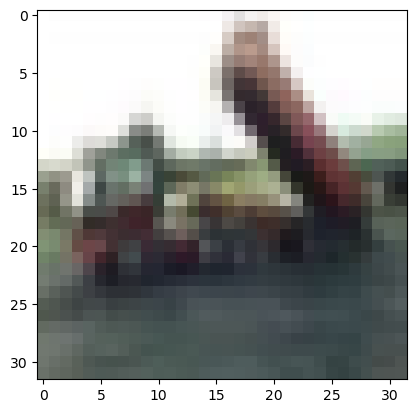

In [14]:
plt.imshow(X_train[2])

In [15]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [40]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

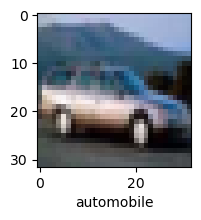

In [16]:
plot_sample(X_train, y_train, 4)

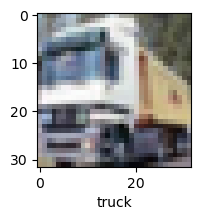

In [17]:
plot_sample(X_train, y_train, 1)

In [18]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255
#. Hence to normalize in 0-->1 range, we need to divide it by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),#flatten 2d ne 1d ma convert kare che
    layers.Dense(3000,activation='relu'),#dense layer directly connect thai jay bcoz of seq api
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')])

In [23]:
#to compile model SGD=stochastic gradient descent=minima point | entropy=ketli impurity |loss=loss minmum karvano
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
history=ann.fit(X_train,y_train,epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.5754 - loss: 1.2069
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.5855 - loss: 1.1780
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.5928 - loss: 1.1510
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.6085 - loss: 1.1162
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 66ms/step - accuracy: 0.6171 - loss: 1.0944
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.6253 - loss: 1.0705
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.6410 - loss: 1.0430
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.6459 - loss: 1.0242
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6545 - loss: 0.9942
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.6689 - loss: 0.9532
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.6785 - loss: 0.9301
Epoch 1

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      1000
           1       0.64      0.75      0.69      1000
           2       0.56      0.32      0.41      1000
           3       0.37      0.44      0.40      1000
           4       0.46      0.59      0.52      1000
           5       0.48      0.46      0.47      1000
           6       0.63      0.65      0.64      1000
           7       0.63      0.65      0.64      1000
           8       0.67      0.73      0.70      1000
           9       0.70      0.49      0.57      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000



# convolutional neural network to train our images

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\91740\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7652 - loss: 0.6726
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7816 - loss: 0.6264
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7909 - loss: 0.5979
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8014 - loss: 0.5660
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8108 - loss: 0.5430
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8181 - loss: 0.5171
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8237 - loss: 0.5009
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8376 - loss: 0.4636
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8405 - loss: 0.4541
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8428 - loss: 0.4402


In [34]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6887 - loss: 1.0463


[1.0636075735092163, 0.6887999773025513]

In [35]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[6.33251562e-04, 6.40000917e-06, 2.54854152e-04, 9.82019246e-01,
        1.13754195e-05, 1.69520471e-02, 1.18303520e-04, 2.41205930e-06,
        1.88835656e-06, 1.61939155e-07],
       [1.38997793e-05, 7.11853383e-04, 8.89943408e-09, 1.03953282e-08,
        9.14306998e-12, 3.60553427e-11, 9.92653876e-13, 2.72443309e-13,
        9.99270737e-01, 3.43175270e-06],
       [1.67360604e-01, 3.41759510e-02, 1.41169215e-02, 6.42730743e-02,
        8.50660785e-04, 1.91004435e-03, 8.29379773e-04, 2.08662003e-02,
        6.91849887e-01, 3.76732019e-03],
       [9.86868560e-01, 6.57700220e-05, 7.56154815e-03, 3.32190393e-04,
        6.74969342e-05, 1.71080355e-05, 4.15255528e-07, 9.18158719e-07,
        5.07995673e-03, 5.98292854e-06],
       [1.09003135e-08, 1.65932295e-06, 6.09443560e-02, 2.11109556e-02,
        4.03785676e-01, 1.20993798e-04, 5.14035881e-01, 1.20820658e-07,
        1.14853087e-07, 1.97331659e-07]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [37]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

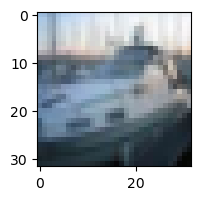

In [44]:
plot_sample(X_test, y_test,2)

In [45]:
classes[y_classes[2]]

'ship'

In [43]:
classes[y_classes[3]]

'airplane'

In [46]:
classes[y_classes[6]]

'cat'